Steps we will do 

(1) Data Cleaning

(2) Exploratory Data Analysis

(3) Feature Engineering 

In [2]:
#import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [4]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
##MIssing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Insights and Observations 
The dataset has missing values 



##DataCleaning

In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [10]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [11]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_copy=df.copy()

In [13]:
df_copy=df_copy.drop(df_copy.index[10472])

In [14]:
df_copy.shape

(10840, 13)

In [15]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
##Convert the reviews dataa type to int 
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [18]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [20]:
df_copy["Size"].dtype

dtype('O')

In [21]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [22]:
df_copy["Size"]

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [23]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [24]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [27]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [28]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [29]:
df_copy['Installs']=df_copy['Installs'].astype(int)

In [30]:
df_copy['Price']=df_copy['Price'].astype(float)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [32]:
#Handling the last update featrure 
df_copy["Last Updated"].unique()


array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [33]:
df_copy['Last Updated']=pd.to_datetime(df_copy["Last Updated"])

In [34]:
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['month']=df_copy['Last Updated'].dt.month
df_copy['year']=df_copy['Last Updated'].dt.year

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  month           10840 non-null  int32         
 15  year   

In [36]:
df_copy.to_csv('data/google_cleaned.csv')

In [37]:
##EDA
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [38]:
df_copy[df_copy.duplicated('App')].shape


(1181, 16)

## observation

data set has duplicate recors


In [39]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [40]:
df_copy.shape


(9659, 16)

Explore Data

In [41]:
# Numeric features
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

# Categorical features
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")


We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'month', 'year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [42]:
#proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Fr. Daoud Lamei                                      0.009224
Poop FR                                              0.009224
PLMGSS FR                                            0.009224
List iptv FR                                         0.009224
Kids Paint Free - Drawing Fun                        0.009224
Name: proportion, Length: 9660, dtype: float64
---------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903

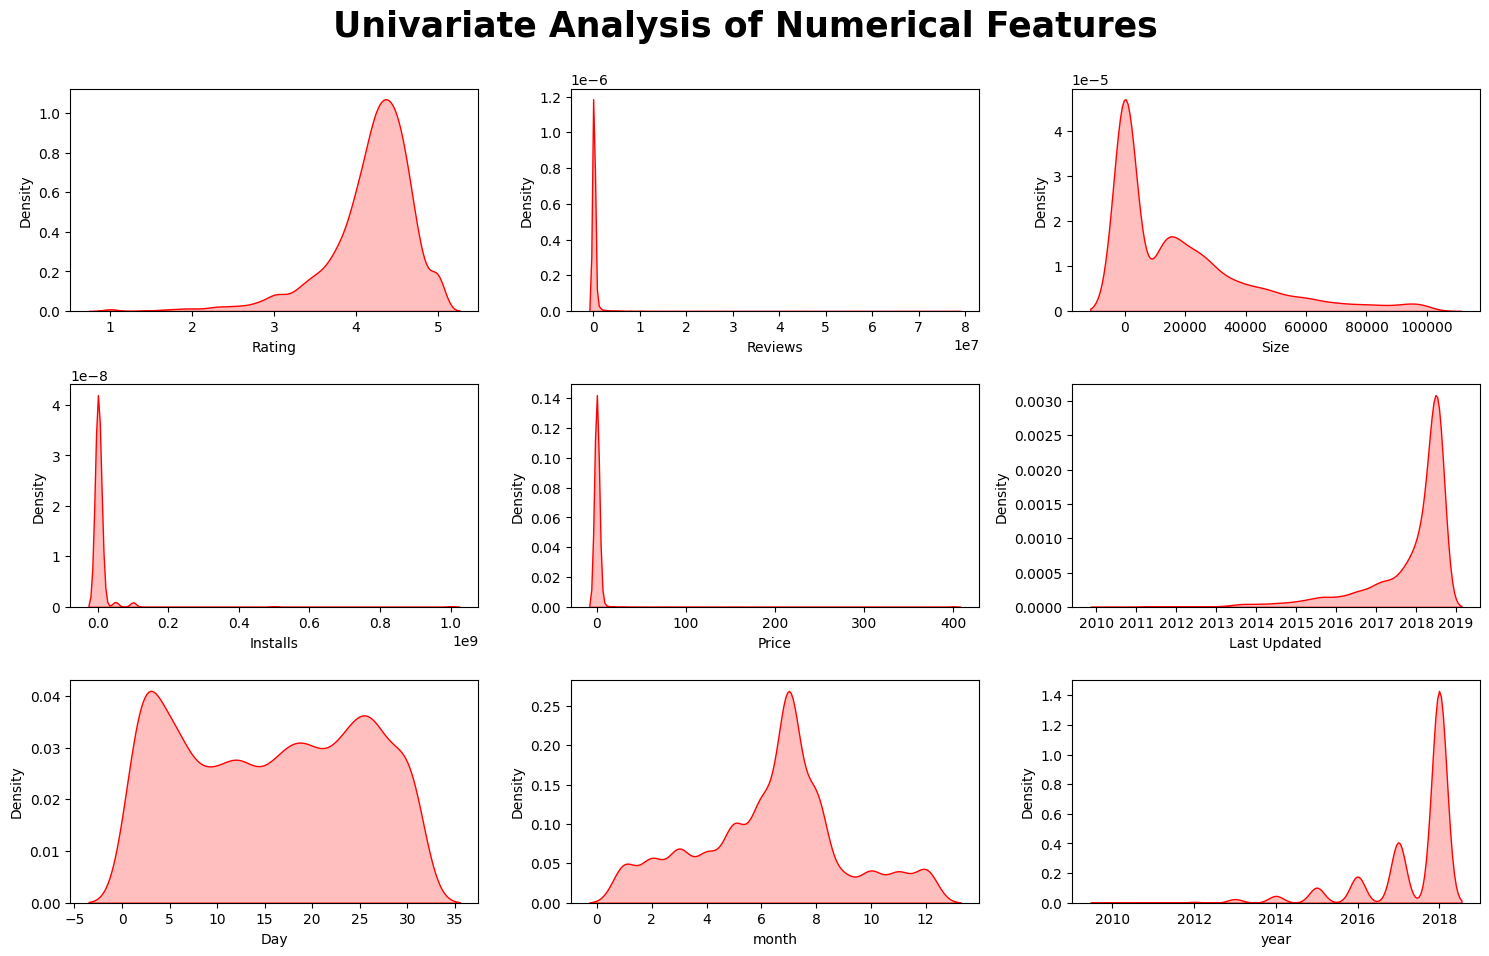

In [45]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',y=1,fontsize=25,fontweight='bold')

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Sure 🙂
Neeche **clean, exam-ready + interview-ready English notes** diye gaye hain. Tum inhe **direct notebook / PDF / revision notes** me use kar sakte ho.

---

# Univariate Analysis of Numerical Features using KDE Plot

## 1. Purpose of the Code

The main objective of this code is to perform **univariate analysis** on numerical features of a dataset.

**Univariate analysis** focuses on analyzing **one variable at a time** to understand:

* The distribution of values
* The spread and concentration of data
* Skewness (left-skewed or right-skewed)
* Possible presence of outliers

This step is a crucial part of **Exploratory Data Analysis (EDA)** and is usually done **before feature engineering and model building**.

---

## 2. Creating the Figure

```python
plt.figure(figsize=(15,15))
```

This line creates a large figure (canvas) to accommodate multiple plots.

**Why it is used:**

* Multiple numerical features are plotted together
* A larger figure prevents overlapping and improves readability

---

## 3. Adding a Super Title

```python
plt.suptitle(
    'Univariate Analysis of Numerical Features',
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1
)
```

This adds a **main title** for the entire figure.

**Explanation of parameters:**

* `fontsize=20` → Makes the title large and readable
* `fontweight='bold'` → Highlights the title
* `alpha=0.8` → Adds slight transparency
* `y=1` → Positions the title slightly above the plots

---

## 4. Looping Through Numerical Features

```python
for i in range(0, len(numeric_features)):
```

This loop iterates over each numerical column in the dataset.

**Why it is used:**

* To automatically generate a plot for every numerical feature
* Avoids writing repetitive plotting code

---

## 5. Creating Subplots

```python
plt.subplot(5,3,i+1)
```

This divides the figure into a grid of **5 rows and 3 columns**.

**Why it is used:**

* Allows multiple plots to be shown in a structured layout
* `i+1` ensures each feature is plotted in a new subplot

---

## 6. KDE Plot (Kernel Density Estimation)

```python
sns.kdeplot(
    x=df_copy[numeric_features[i]],
    shade=True,
    color='r'
)
```

### What is a KDE Plot?

A **Kernel Density Estimation (KDE) plot** is a smooth curve that represents the **probability density function** of a continuous variable.

It is a refined and smooth alternative to histograms.

---

## 7. Why KDE Plot is Used Instead of Histogram

**Limitations of Histograms:**

* Shape depends heavily on bin size
* Appears blocky and less smooth
* Harder to compare distributions

**Advantages of KDE Plot:**

* Produces a smooth and continuous curve
* Clearly shows the distribution shape
* Helps identify:

  * Skewness
  * Data concentration
  * Long tails
  * Potential outliers
* Easier to interpret for machine learning preprocessing

---

## 8. Shading the Area

```python
shade=True
```

This fills the area under the KDE curve.

**Why it is used:**

* Improves visual interpretation of density

* Makes distribution more intuitive

---

## 9. Labeling the X-Axis

```python
plt.xlabel(numeric_features[i])
```

This labels each subplot with the corresponding feature name.

**Why it is important:**

* Clearly identifies which feature is being analyzed

* Improves readability and understanding

---

## 10. Adjusting Layout

```python
plt.tight_layout()
```

This automatically adjusts spacing between subplots.

**Why it is used:**

* Prevents overlapping of plots, labels, and titles

* Ensures a clean and professional visualization

---

## 11. What Insights We Get from This Analysis

Using KDE plots, we can:

* Determine whether features follow a **normal distribution**

* Identify **right-skewed or left-skewed** variables

* Decide if **log transformation or scaling** is required

* Detect features that may contain **outliers**

* Prepare features for **feature engineering and modeling**



> “We use KDE plots for univariate analysis of numerical features to understand their distribution, density, and skewness. KDE provides a smooth estimation of the probability density function, making it easier to identify patterns, tails, and potential outliers compared to histograms. This analysis helps in making informed decisions for data preprocessing and feature transformation.”

---




##Observation

rating and year are left skewed while REVIEWS sIZE INSTALLS and Price are right skewed

count plot is used fro categories

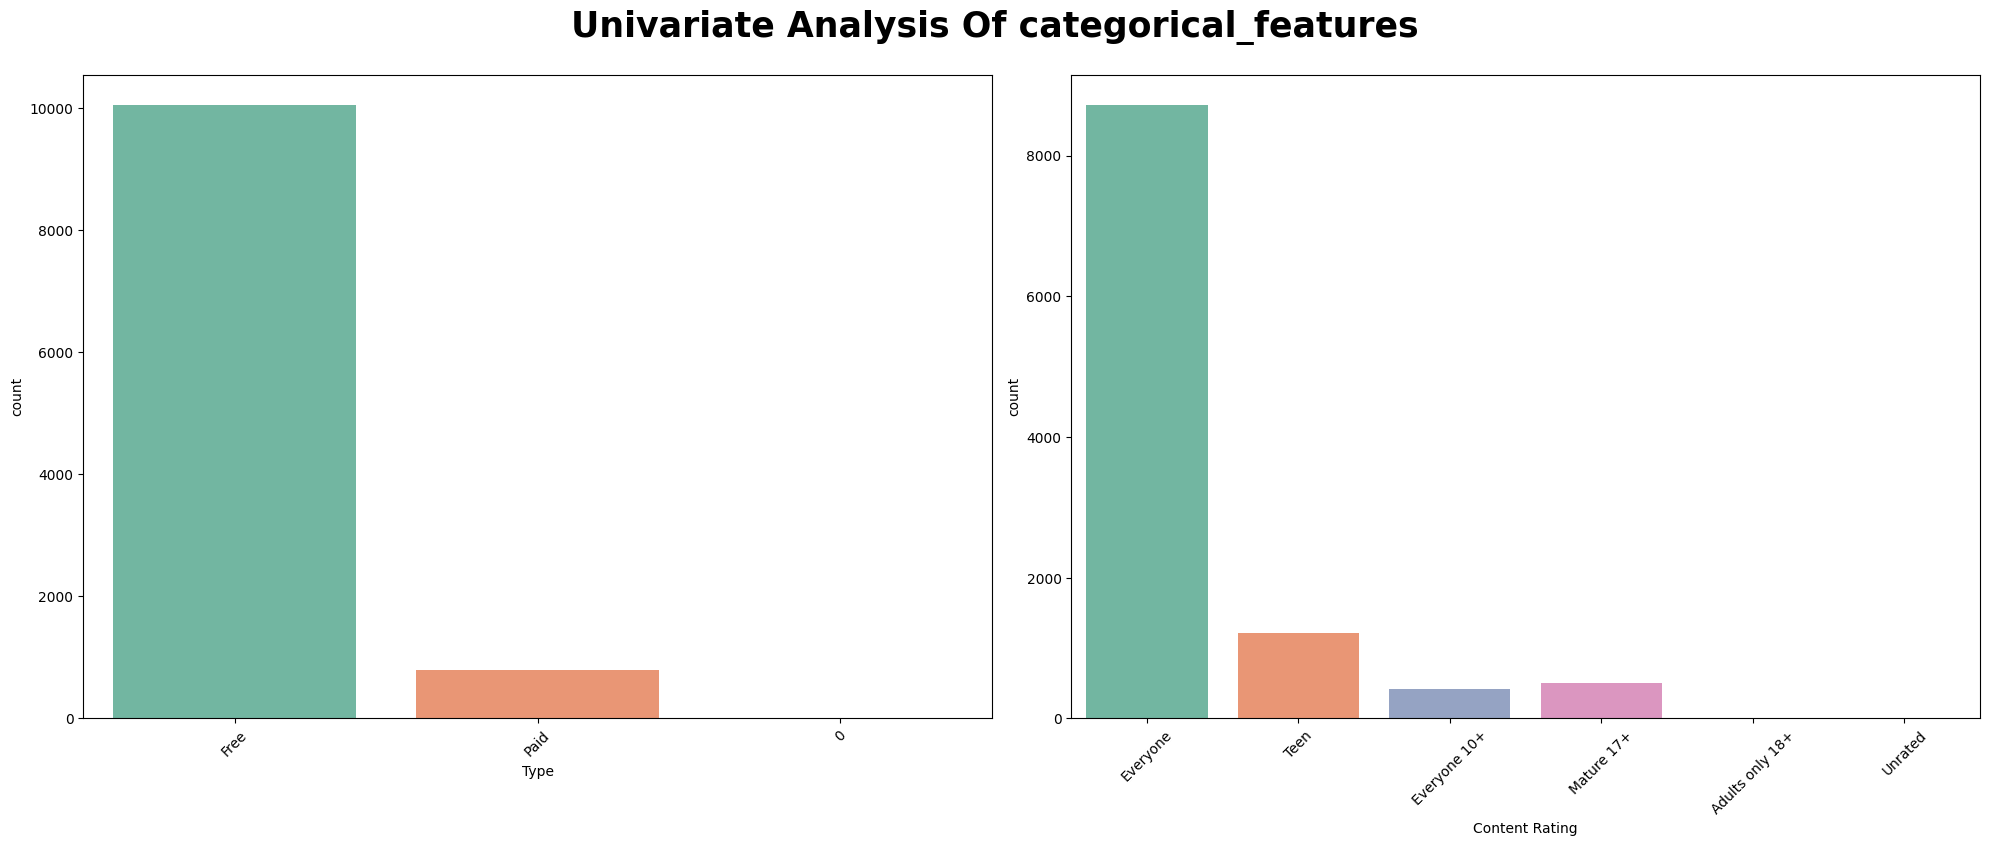

In [51]:
#categorical columns 

plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis Of categorical_features",fontsize=25,fontweight='bold',y=1)
category=['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


Got it 👍
Below are **clean, well-structured, exam-ready + interview-ready English notes**, written in the **same style and depth** as the numerical features explanation.

---

# Univariate Analysis of Categorical Features using Count Plot

## 1. Purpose of the Code

The objective of this code is to perform **univariate analysis on selected categorical features** of the dataset.

Univariate analysis of categorical variables helps us understand:

* The frequency distribution of categories
* Class imbalance in the data
* Dominant and rare categories

This analysis is essential before **encoding categorical variables** and building machine learning models.

---

## 2. Creating the Figure

```python
plt.figure(figsize=(20,15))
```

This line creates a large figure to display multiple categorical plots clearly.

**Why it is used:**

* Categorical plots often contain text labels
* Larger figure size improves readability and avoids overlapping

---

## 3. Adding a Super Title

```python
plt.suptitle(
    "Univariate Analysis Of categorical_features",
    fontsize=25,
    fontweight='bold',
    y=1
)
```

This adds a main title for the entire figure.

**Explanation of parameters:**

* `fontsize=25` → Large and clear title
* `fontweight='bold'` → Emphasizes the heading
* `y=1` → Positions the title slightly above the plots

---

## 4. Selecting Specific Categorical Features

```python
category = ['Type', 'Content Rating']
```

### Why was this list created?

In most real-world datasets, there are **many categorical columns**, but not all of them are suitable for count plots.

**Reasons for selecting only these features:**

* These columns have **low cardinality** (few unique values)
* They are **easy to interpret**
* They provide meaningful business insights
* High-cardinality features (e.g., App names, Versions) would make plots cluttered and unreadable

**Example:**

* `Type` → Free, Paid
* `Content Rating` → Everyone, Teen, Mature, etc.

**Key EDA principle:**

> Count plots should be used only for categorical features with a limited number of categories.

---

## 5. Looping Through the Selected Categories

```python
for i in range(0, len(category)):
```

This loop iterates over each selected categorical feature.

**Why it is used:**

* Avoids writing repetitive plotting code
* Makes the code scalable if more features are added later

---

## 6. Creating Subplots

```python
plt.subplot(2, 2, i+1)
```

This divides the figure into a grid of **2 rows and 2 columns**.

**Why it is used:**

* Allows multiple categorical plots in a single figure
* Maintains a clean and organized layout
* Extra empty slots allow future expansion

---

## 7. Count Plot

```python
sns.countplot(x=df[category[i]], palette='Set2')
```

### What is a Count Plot?

A **count plot** shows the number of occurrences of each category in a categorical feature.

**Why count plots are used:**

* Best visualization for categorical variables
* Clearly shows category frequency
* Helps identify class imbalance

---

## 8. Labeling the X-Axis

```python
plt.xlabel(category[i])
```

This labels each subplot with the feature name.

**Why it is important:**

* Clearly indicates which categorical feature is being analyzed
* Improves interpretability

---

## 9. Rotating X-axis Labels

```python
plt.xticks(rotation=45)
```

This rotates the category labels by 45 degrees.

**Why it is used:**

* Prevents overlapping of text labels
* Improves readability

---

## 10. Adjusting Layout

```python
plt.tight_layout()
```

This automatically adjusts spacing between subplots.

**Why it is used:**

* Prevents overlapping of plots and labels
* Ensures a professional and clean visualization

---

## 11. Insights Gained from This Analysis

Using univariate count plots, we can:

* Identify dominant and minority categories
* Detect class imbalance issues
* Decide appropriate encoding techniques
* Determine whether resampling or grouping is required


> “We performed univariate analysis on selected low-cardinality categorical features using count plots to understand category distribution and class imbalance. Selecting only relevant categorical variables ensures clean, interpretable visualizations and supports informed preprocessing decisions.”




##which is the most popular app category 


In [52]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

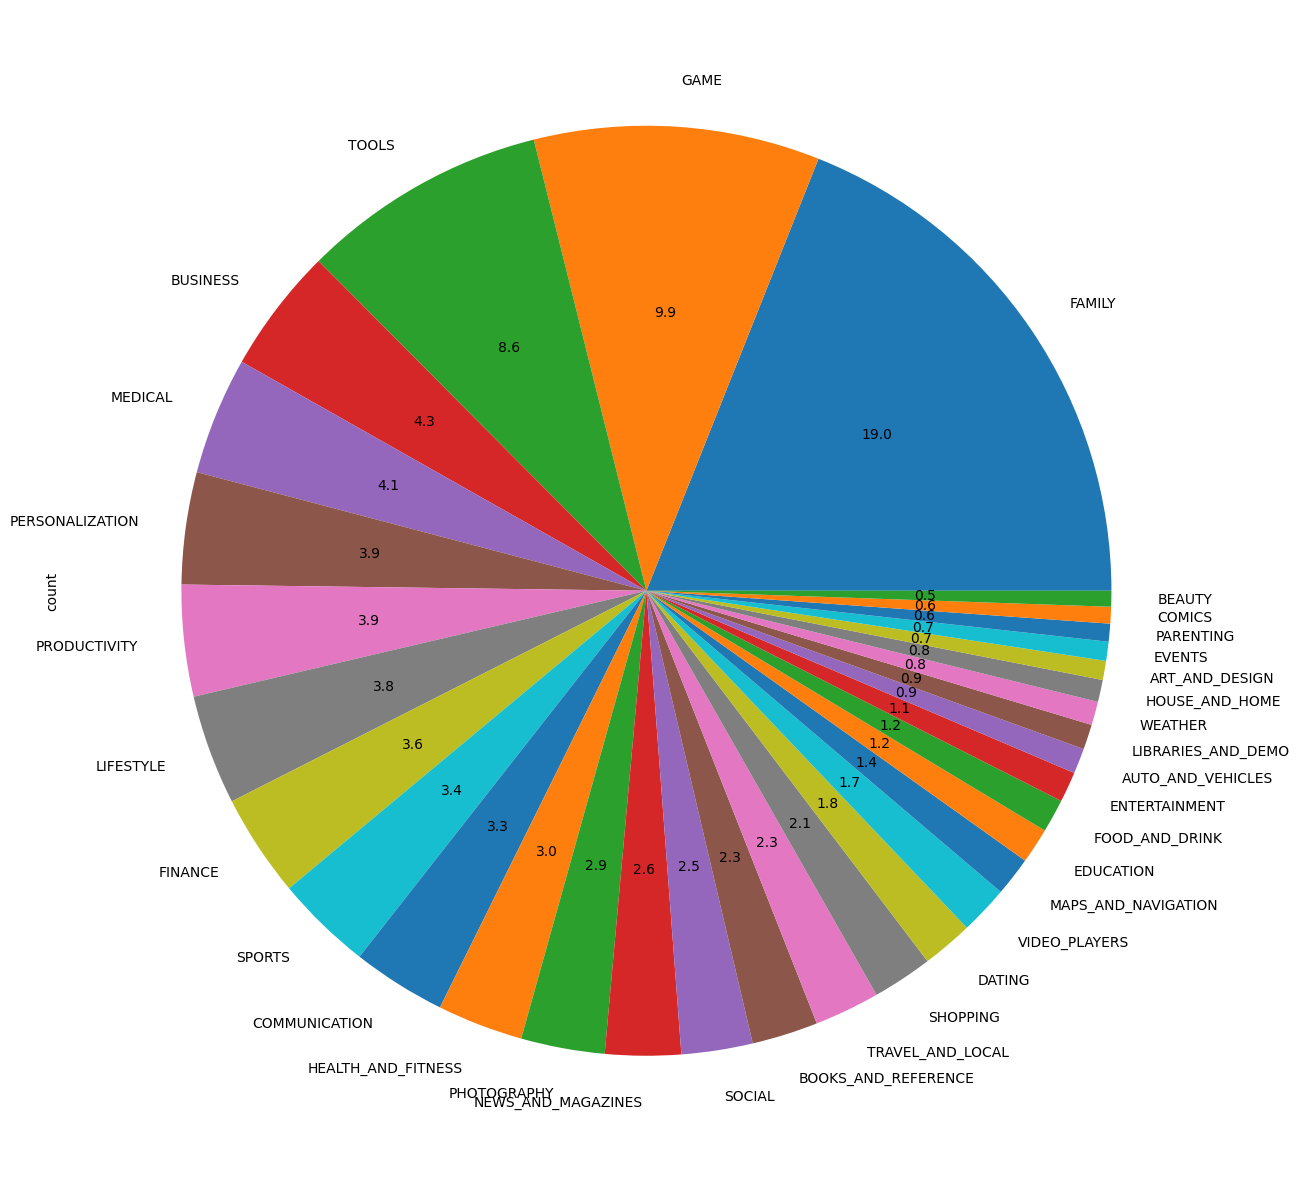

In [59]:
df_copy['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

##Top 10 apps

In [66]:
# Create category count DataFrame
category = df_copy['Category'].value_counts().reset_index()

# Rename columns properly
category.columns = ['Category', 'Count']

# Display result
category.head()


,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [67]:
category

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


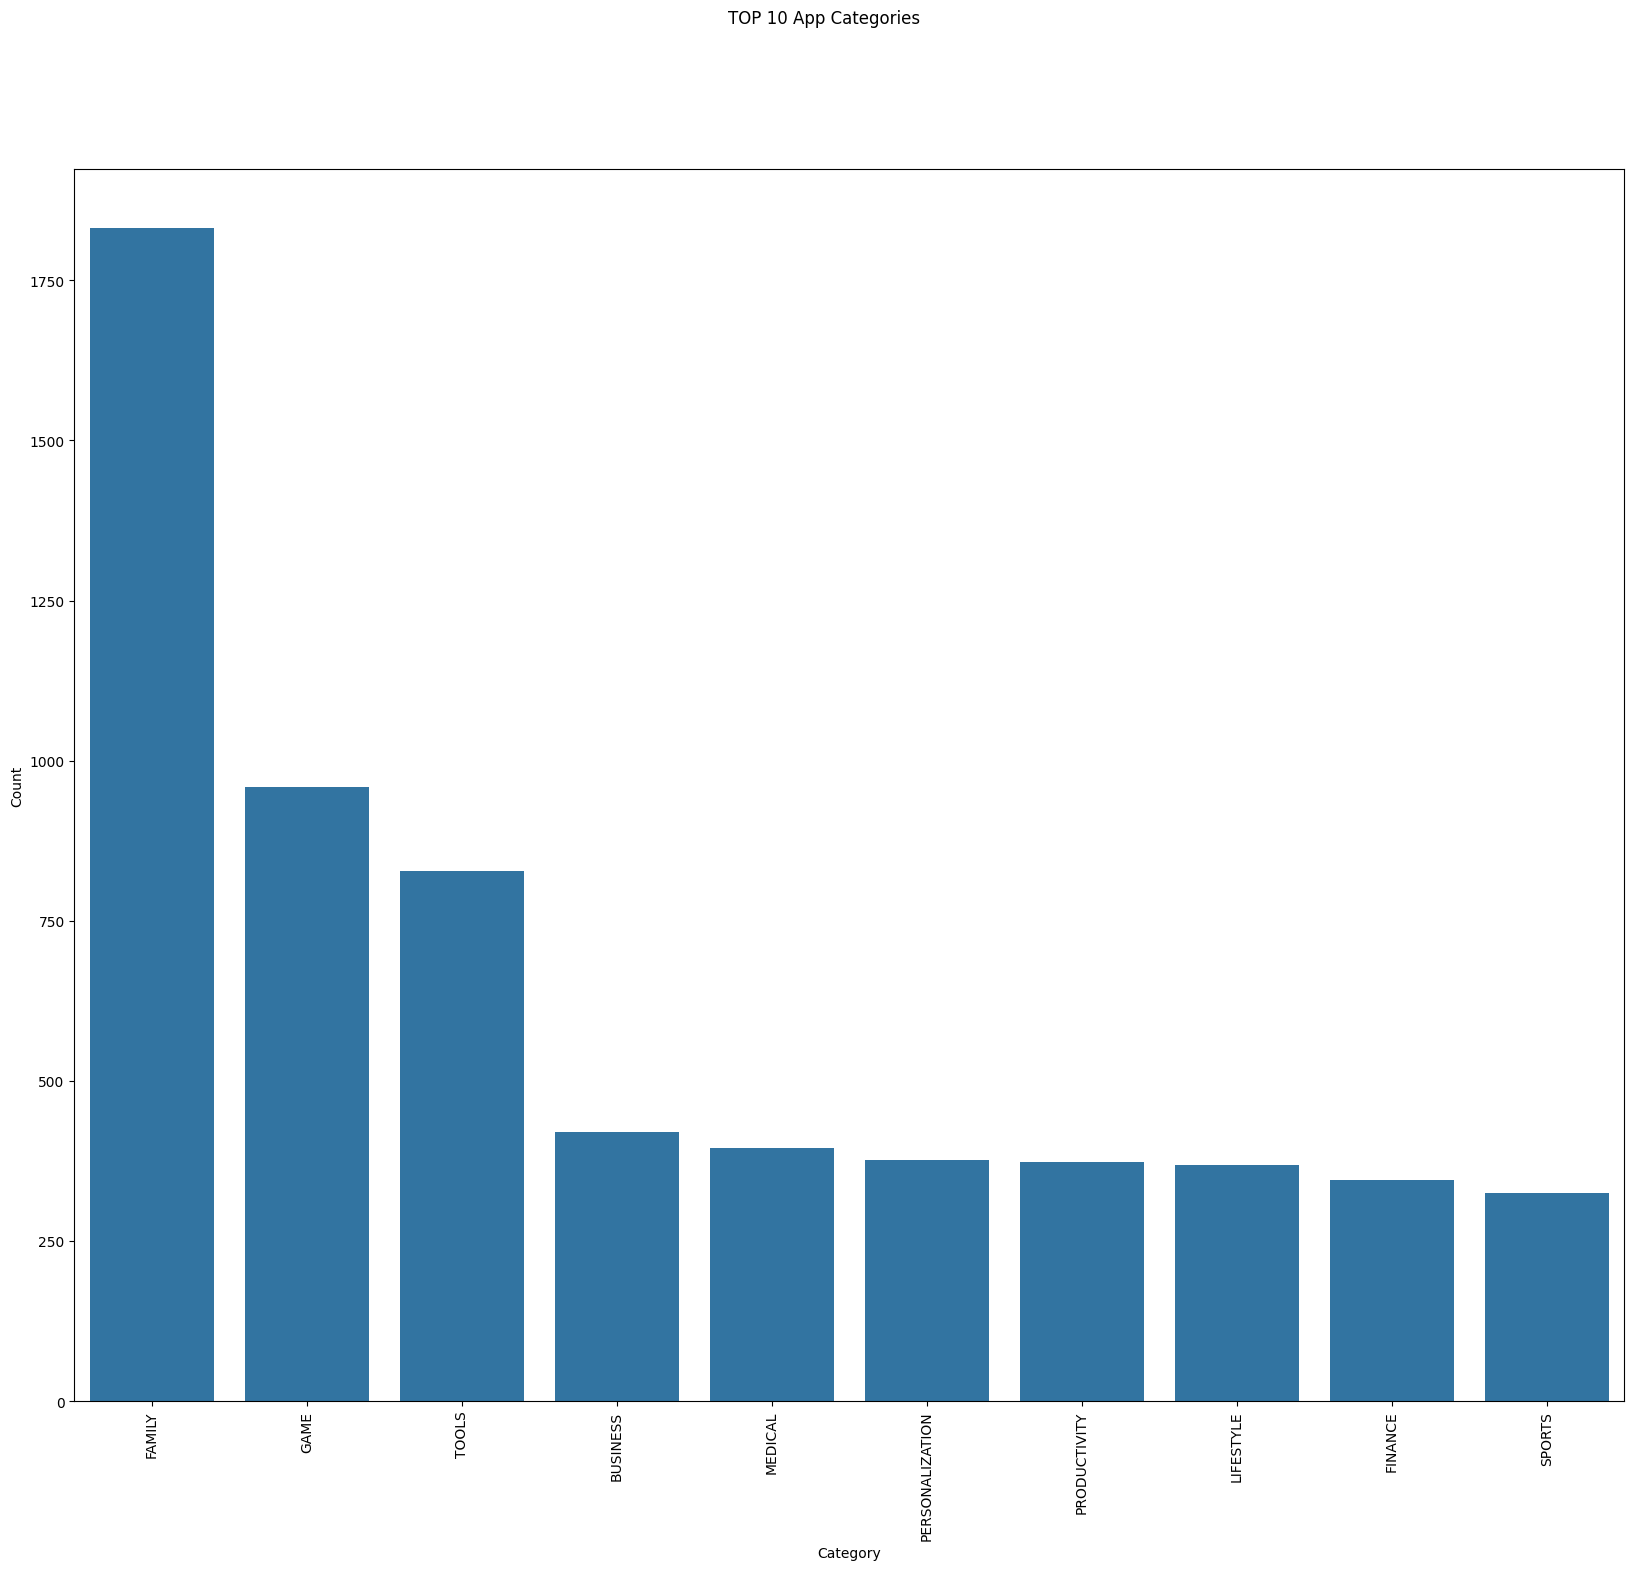

In [ ]:
plt.figure(figsize=(15,16))
plt.suptitle("TOP 10 App Categories")

sns.barplot(
    x='Category',
    y='Count',
    data=category.head(10)
)

plt.xticks(rotation=90)
plt.show()
